In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#plt.style.use('/Users/paolostornati/Phd/phdthesis.mpltstyle')
niceblack="#262626"
from matplotlib.colors import ListedColormap
from palettable.cartocolors.sequential import DarkMint_7
import palettable
cmap = ListedColormap(DarkMint_7.mpl_colors)
colors_mint = cmap.colors


In [2]:
df = pd.read_csv(r'./All_data.dat' , delimiter='  ', skip_blank_lines=True)

/home/debasish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df

,Lx,lambda,mu_y,theta,bondD,Energy_GS,winding,eA,eB,MA,MB,U4,Oflip,Oflipp,charge
0,10,-1.0,0.20,0.0,15,-25.738233,-5.113079,8.175913,8.175913,6.485783,6.485783,0.959230,16.351826,0.000000,0.0
1,10,-1.0,0.22,0.0,15,-25.738233,-5.113079,8.175913,8.175913,-6.485783,-6.485783,0.959230,16.351826,-0.000000,0.0
2,10,-1.0,0.24,0.0,15,-25.738233,-5.113079,8.175913,8.175913,-6.485783,-6.485783,0.959230,16.351826,-0.000000,-0.0
3,10,-1.0,0.26,0.0,15,-25.738233,-5.113079,8.175913,8.175913,6.485783,6.485783,0.959230,16.351826,-0.000000,-0.0
4,10,-1.0,0.28,0.0,15,-25.738233,-5.113079,8.175913,8.175913,6.485783,6.485783,0.959230,16.351826,-0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,8,-1.0,1.42,0.0,15,-27.726897,2.381663,2.870162,2.870162,-0.174098,0.174098,0.883863,5.740325,1.864583,-0.0
368,8,-1.0,1.44,0.0,15,-27.966897,2.381663,2.870162,2.870162,-0.174098,0.174098,0.883863,5.740325,1.864583,0.0
369,8,-1.0,1.46,0.0,15,-28.206897,2.381663,2.870162,2.870162,-0.174098,0.174098,0.883863,5.740325,1.864583,-0.0
370,8,-1.0,1.48,0.0,15,-28.446897,2.381663,2.870162,2.870162,-0.174098,0.174098,0.883863,5.740325,1.864583,0.0


In [4]:
df.sort_values(by=['Lx'])

,Lx,lambda,mu_y,theta,bondD,Energy_GS,winding,eA,eB,MA,MB,U4,Oflip,Oflipp,charge
237,3,-1.0,0.96,0.0,15,-9.695773,-0.063455,1.642629,1.642629,-0.833105,-0.833105,0.797073,3.285258,0.000000,0.0
226,3,-1.0,0.74,0.0,15,-8.815773,-0.063455,1.642629,1.642629,0.833105,0.833105,0.797073,3.285258,-0.000000,0.0
227,3,-1.0,0.76,0.0,15,-8.895773,-0.063455,1.642629,1.642629,0.833105,0.833105,0.797073,3.285258,0.000000,0.0
228,3,-1.0,0.78,0.0,15,-8.975773,-0.063455,1.642629,1.642629,-0.833105,-0.833105,0.797073,3.285258,0.000000,0.0
230,3,-1.0,0.82,0.0,15,-9.135773,-0.063455,1.642629,1.642629,0.833105,0.833105,0.797073,3.285258,-0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,16,-1.0,0.74,0.0,40,-43.454973,-4.251047,10.998814,10.998814,1.428355,-1.428355,0.969694,21.997628,-1.057350,-0.0
160,16,-1.0,0.76,0.0,40,-43.653797,-3.281180,10.056547,10.778370,0.000000,-0.000000,0.966854,20.834917,-0.000000,0.0
161,16,-1.0,0.78,0.0,40,-43.853797,-3.281180,10.056547,10.778370,0.000000,-0.000000,0.966854,20.834917,-0.000000,0.0
163,16,-1.0,0.82,0.0,40,-44.253797,-3.281180,10.056547,10.778370,-0.000000,0.000000,0.966854,20.834917,-0.000000,-0.0


In [22]:
df.Lx

0      10
1      10
2      10
3      10
4      10
       ..
367     8
368     8
369     8
370     8
371     8
Name: Lx, Length: 372, dtype: int64

In [6]:
#plt.plot(df.Lx)

In [7]:
type(df.Lx)

pandas.core.series.Series

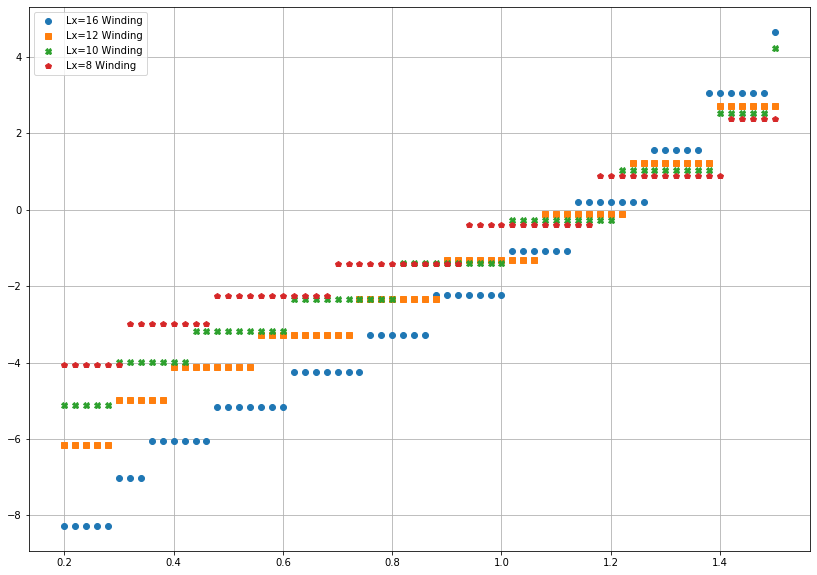

In [75]:
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['winding'], lw=0,marker='o', label= 'Lx=16 Winding')
plt.plot(df[(df['Lx']==12)]['mu_y'], df[(df['Lx']==12)]['winding'], lw=0,marker='s', label= 'Lx=12 Winding')
plt.plot(df[(df['Lx']==10)]['mu_y'], df[(df['Lx']==10)]['winding'], lw=0,marker='X', label= 'Lx=10 Winding')
plt.plot(df[(df['Lx']==8)]['mu_y'], df[(df['Lx']==8)]['winding'], lw=0,marker='p', label= 'Lx=8 Winding')
plt.grid()
plt.legend()

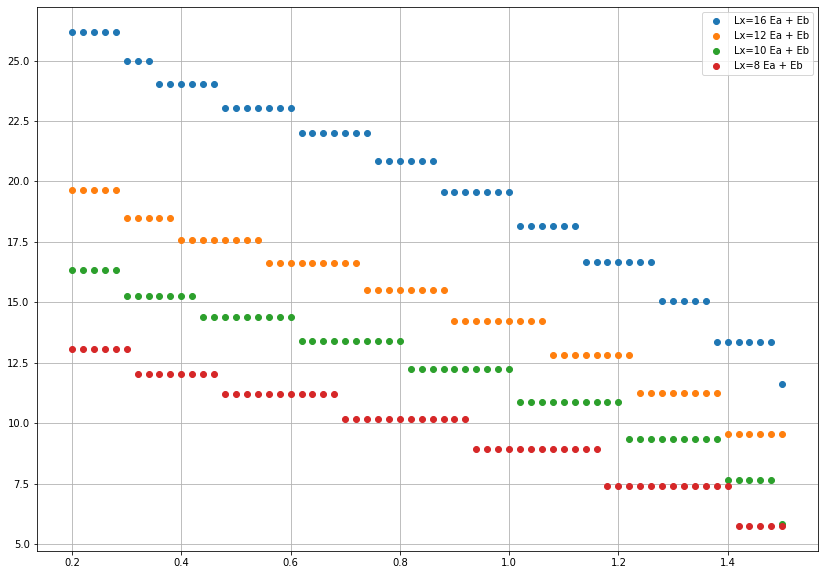

In [30]:
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['eA']+df[(df['Lx']==16)]['eB'], lw=0,marker='o', label= 'Lx=16 Ea + Eb' )    
plt.plot(df[(df['Lx']==12)]['mu_y'],  df[(df['Lx']==12)]['eA']+df[(df['Lx']==12)]['eB'], lw=0,marker='o', label= 'Lx=12 Ea + Eb' ) 
plt.plot(df[(df['Lx']==10)]['mu_y'],  df[(df['Lx']==10)]['eA']+df[(df['Lx']==10)]['eB'], lw=0,marker='o', label= 'Lx=10 Ea + Eb' ) 
plt.plot(df[(df['Lx']==8)]['mu_y'], df[(df['Lx']==8)]['eA']+df[(df['Lx']==8)]['eB'], lw=0,marker='o', label= 'Lx=8 Ea + Eb' ) 
plt.grid()
plt.legend()

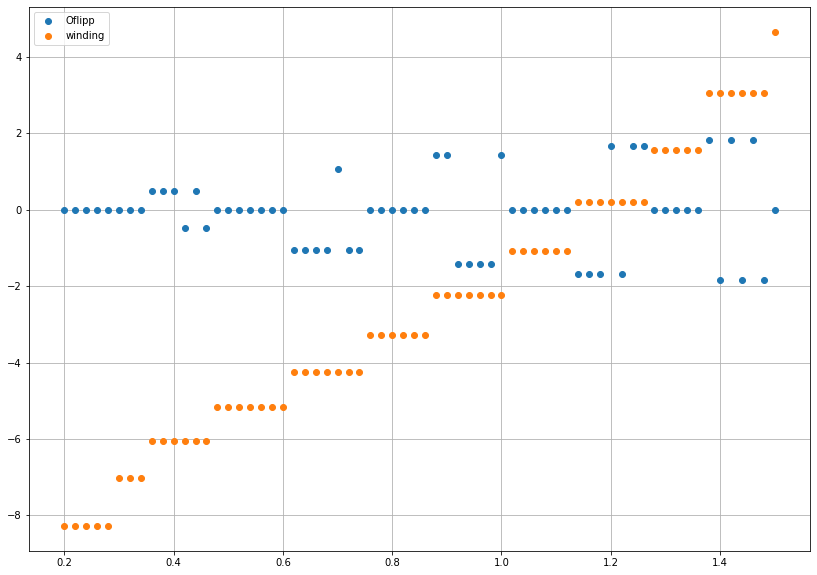

In [31]:
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['Oflipp'], lw=0,marker='o', label = 'Oflipp')
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['winding'], lw=0,marker='o', label = 'winding')
plt.grid()
plt.legend()
#np.diff(df[(df['Lx']==16)]['winding'])

#plt.plot(df[(df['Lx']==12)]['mu_y'], df[(df['Lx']==12)]['Oflipp'], lw=0,marker='o')
#plt.plot(df[(df['Lx']==8)]['mu_y'], df[(df['Lx']==8)]['Oflipp'], lw=0,marker='o')

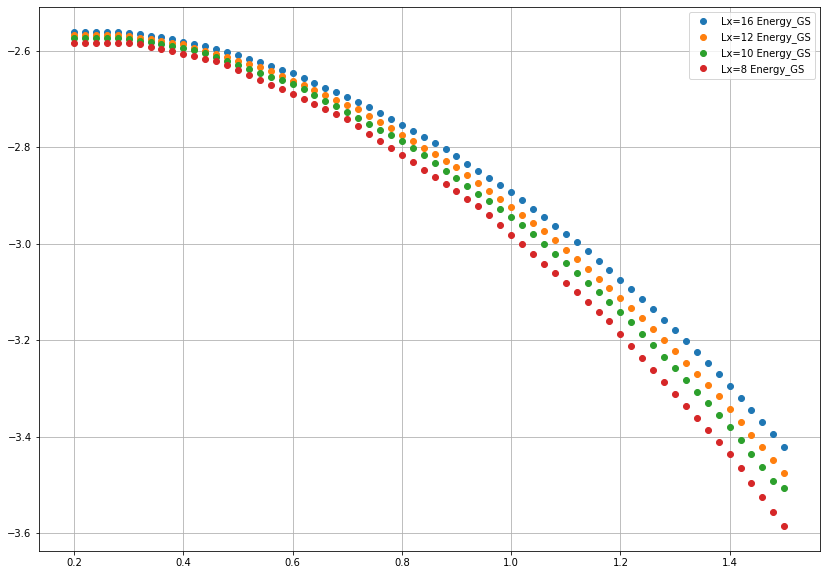

In [32]:
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['Energy_GS']/16, lw=0,marker='o', label= 'Lx=16 Energy_GS')
plt.plot(df[(df['Lx']==12)]['mu_y'], df[(df['Lx']==12)]['Energy_GS']/12, lw=0,marker='o', label= 'Lx=12 Energy_GS')
plt.plot(df[(df['Lx']==10)]['mu_y'], df[(df['Lx']==10)]['Energy_GS']/10, lw=0,marker='o', label= 'Lx=10 Energy_GS')
plt.plot(df[(df['Lx']==8)]['mu_y'], df[(df['Lx']==8)]['Energy_GS']/8, lw=0,marker='o', label= 'Lx=8 Energy_GS')
plt.grid()
plt.legend()

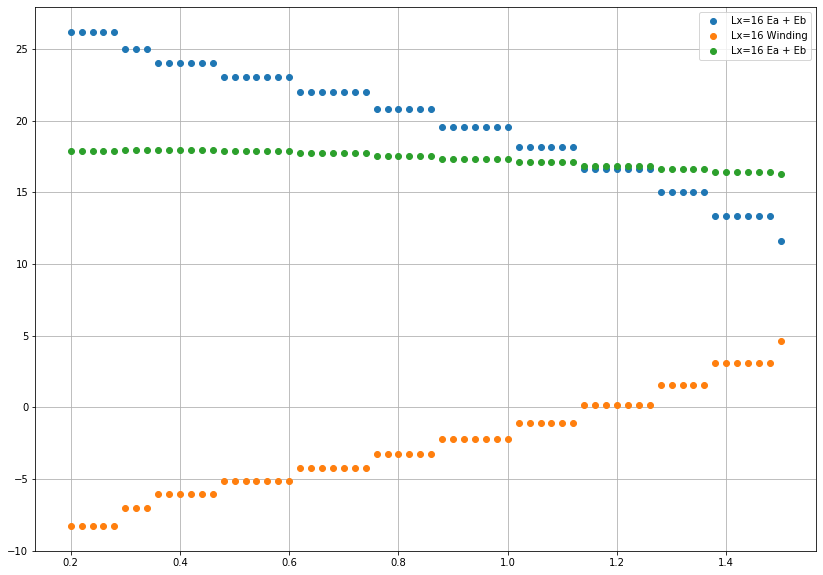

In [34]:
plt.figure(figsize=(14,10))

plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['eA']+df[(df['Lx']==16)]['eB'], lw=0,marker='o', label= 'Lx=16 Ea + Eb' )    
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['winding'], lw=0,marker='o', label= 'Lx=16 Winding')

plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['eA']+df[(df['Lx']==16)]['eB']+df[(df['Lx']==16)]['winding'], lw=0,marker='o', label= 'Lx=16 Ea + Eb' )    


plt.grid()
plt.legend()


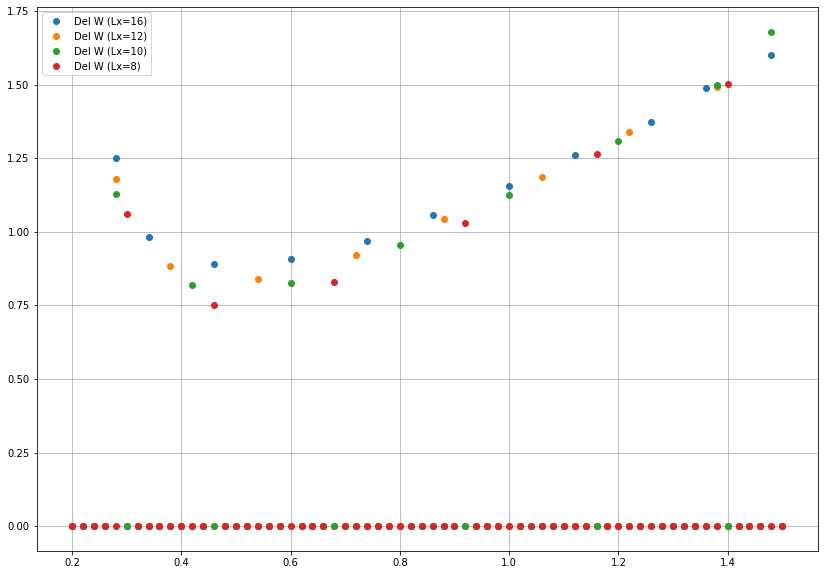

In [77]:
plt.figure(figsize=(14,10))
differences_16= list(np.diff(df[(df['Lx']==16)]['winding']))
differences_16.append(0)

differences_12= list(np.diff(df[(df['Lx']==12)]['winding']))
differences_12.append(0)

differences_10= list(np.diff(df[(df['Lx']==10)]['winding']))
differences_10.append(0)

differences_8= list(np.diff(df[(df['Lx']==8)]['winding']))
differences_8.append(0)

#plt.plot(df[(df['Lx']==16)]['mu_y'], differences_16/df[(df['Lx']==16)]['mu_y'], lw=0,marker='o', label = 'dW/dMu (Lx=16)')
#plt.plot(df[(df['Lx']==12)]['mu_y'], differences_12/df[(df['Lx']==12)]['mu_y'], lw=0,marker='o', label = 'dW/dMu (Lx=12)')
#plt.plot(df[(df['Lx']==10)]['mu_y'], differences_10/df[(df['Lx']==10)]['mu_y'], lw=0,marker='o', label = 'dW/dMu (Lx=10)')
#plt.plot(df[(df['Lx']==8)]['mu_y'], differences_8/df[(df['Lx']==8)]['mu_y'], lw=0,marker='o', label = 'dW/dMu (Lx=8)')

plt.plot(df[(df['Lx']==16)]['mu_y'], differences_16, lw=0,marker='o', label = 'Del W (Lx=16)')
plt.plot(df[(df['Lx']==12)]['mu_y'], differences_12, lw=0,marker='o', label = 'Del W (Lx=12)')
plt.plot(df[(df['Lx']==10)]['mu_y'], differences_10, lw=0,marker='o', label = 'Del W (Lx=10)')
plt.plot(df[(df['Lx']==8)]['mu_y'], differences_8, lw=0,marker='o', label = 'Del W (Lx=8)')

plt.grid()
plt.legend()


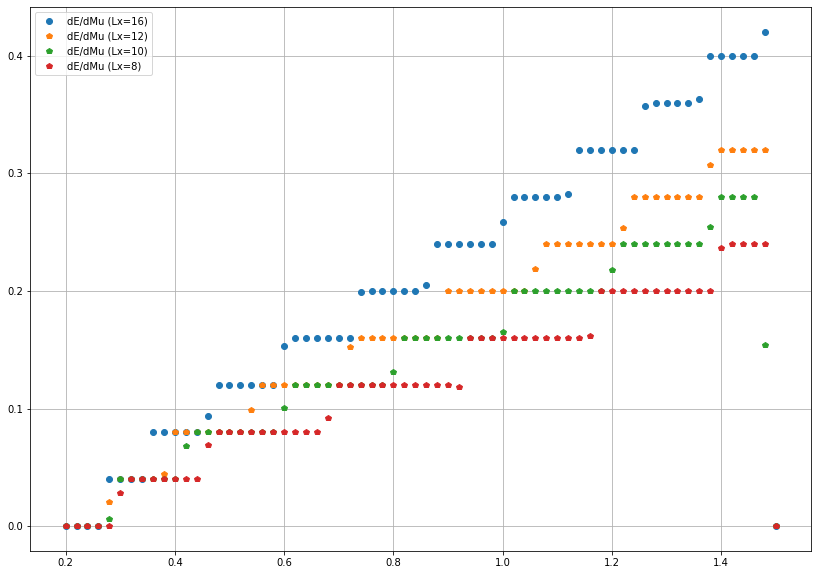

In [58]:
plt.figure(figsize=(14,10))
dE_L16= list(-np.diff(df[(df['Lx']==16)]['Energy_GS']))
dE_L16.append(0)
dE_L12= list(-np.diff(df[(df['Lx']==12)]['Energy_GS']))
dE_L12.append(0)
dE_L10= list(-np.diff(df[(df['Lx']==10)]['Energy_GS']))
dE_L10.append(0)
dE_L8= list(-np.diff(df[(df['Lx']==8)]['Energy_GS']))
dE_L8.append(0)

plt.plot(df[(df['Lx']==16)]['mu_y'], dE_L16, lw=0,marker='o', label = 'dE/dMu (Lx=16)')
plt.plot(df[(df['Lx']==12)]['mu_y'], dE_L12, lw=0,marker='p', label = 'dE/dMu (Lx=12)')
plt.plot(df[(df['Lx']==10)]['mu_y'], dE_L10, lw=0,marker='p', label = 'dE/dMu (Lx=10)')
plt.plot(df[(df['Lx']==8)]['mu_y'], dE_L8, lw=0,marker='p', label = 'dE/dMu (Lx=8)')

plt.grid()
plt.legend()


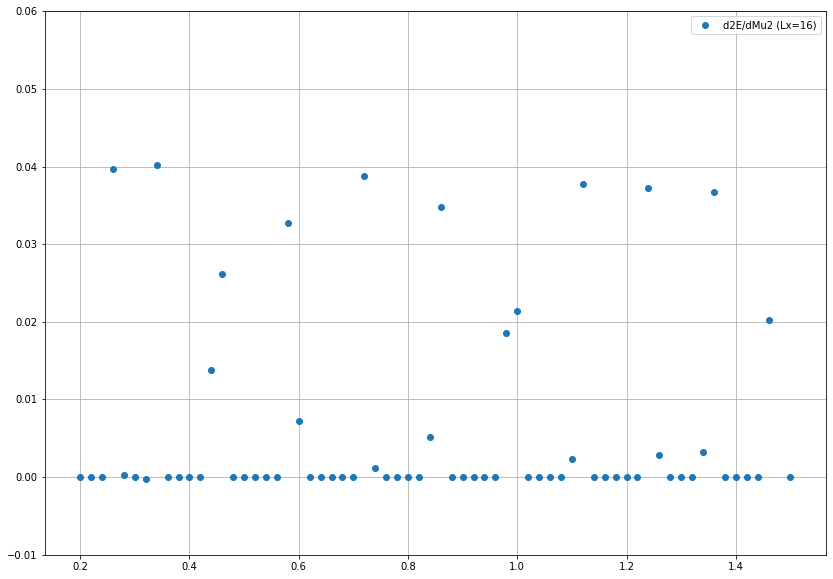

In [83]:
plt.figure(figsize=(14,10))
d2E_L16= list(np.diff(dE_L16))
d2E_L16.append(0)
plt.ylim([-0.01,0.06])
plt.plot(df[(df['Lx']==16)]['mu_y'], d2E_L16, lw=0,marker='o', label = 'd2E/dMu2 (Lx=16)')
plt.grid()
plt.legend()
#dE_L12= list(-np.diff(df[(df['Lx']==12)]['Energy_GS']))
#dE_L12.append(0)
#dE_L10= list(-np.diff(df[(df['Lx']==10)]['Energy_GS']))
#dE_L10.append(0)
#dE_L8= list(-np.diff(df[(df['Lx']==8)]['Energy_GS']))
#dE_L8.append(0)


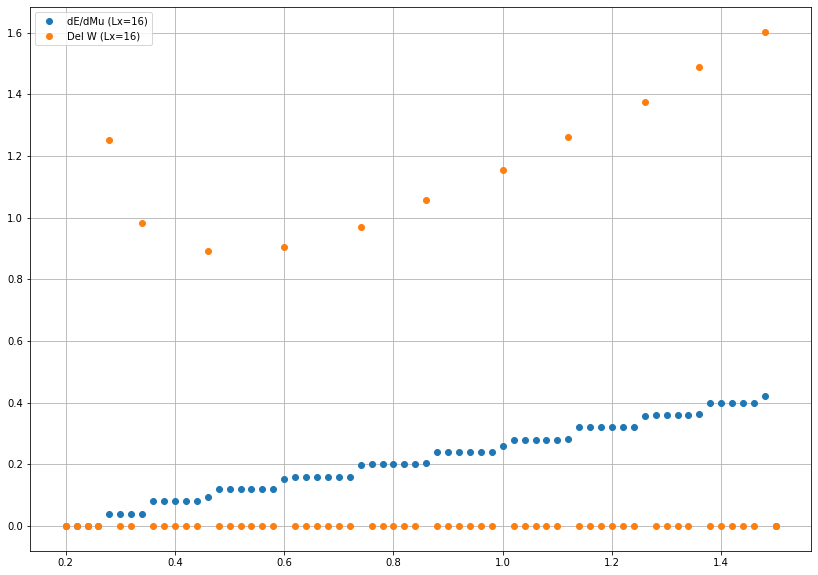

In [74]:
newL = [i * 16 for i in dE_L16]
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==16)]['mu_y'], dE_L16, lw=0,marker='o', label = 'dE/dMu (Lx=16)')
plt.plot(df[(df['Lx']==16)]['mu_y'], differences_16, lw=0,marker='o', label = 'Del W (Lx=16)')
plt.grid()
plt.legend()

In [72]:
newL = [i * 16 for i in dE_L16] 

In [15]:
differences_16 = np.array(differences_16)
mask = differences_16>0

In [16]:
x = np.array(df[(df['Lx']==16)]['mu_y'])

In [17]:
def funzione (x,a,b):
    return a + b *1/(x*x)
    
import scipy.optimize as optimization

In [20]:
fit_result=optimization.curve_fit(funzione, x[mask], differences_16[mask]/x[mask])
a,b=fit_result[0][0],fit_result[0][1]
print(a,b)
print(fit_result)

0.8690950525626017 0.26302594886651565
(array([0.86909505, 0.26302595]), array([[ 0.00320908, -0.00041399],
       [-0.00041399,  0.00012824]]))


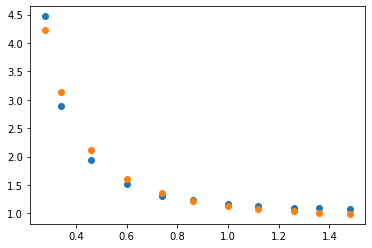

In [21]:

plt.plot(x[mask], differences_16[mask]/x[mask],'o')
plt.plot(x[mask], funzione(x[mask],a,b),'o')




    